# 그래프 테스트

0
1000
Average Point: 100009.0
Final Q-Table Values
[0 1 2 3 4 5]
[[     0.    98018.91  98016.28      0.        0.        0.  ]
 [ 97039.72      0.    98014.96      0.    99007.99      0.  ]
 [ 97042.78  98019.67      0.    98013.25  99002.73      0.  ]
 [     0.        0.    98013.04      0.    99000.99      0.  ]
 [     0.    98018.04  98014.74  98011.98      0.   100001.  ]
 [     0.        0.        0.        0.        0.        0.  ]]
0 -> 1 -> 4 -> 5

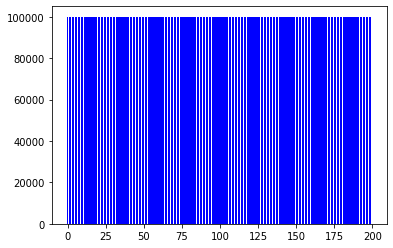

In [6]:

import numpy as np
import matplotlib.pyplot as plt

import random as pr


graph = [
    [[0,1], 1],
    [[0,2], 5],
    [[1,2], 2],
    [[1,4], 7],
    [[2,3], 2], 
    [[2,4], 2], 
    [[3,4], 1],
    [[4,5], 1]
]

NODE_N = 6

START_POS= 0
END_POS = 5

current_pos = START_POS



def actionList(current_pos):
    lis = []
    for edge in graph:
        if (current_pos in edge[0]):
            lis.append(edge[0][1] if edge[0][0] == current_pos else edge[0][0])
    return lis


def step(action, current_pos):
    

    next_pos = action
    

    if is_checked[next_pos] == 1:
        done = 1
        reward = 0
    else:
        done = 0
        # reward = 0

        for edge in graph:
            if(edge[0] == [current_pos, next_pos] or edge[0] == [next_pos, current_pos]):
                reward = edge[1]
                # print(reward)
                break
                

        is_checked[next_pos] = 1
        
    if next_pos == END_POS:
        done = 1
        reward += 100000
    # print(reward)
    return next_pos, reward, done

def rargmax(vector):
    """ Argmax that chooses randomly among eligible maximum indices. """
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)


Q = np.zeros([NODE_N, NODE_N])
num_episodes = 2000
dis = .99
lr = 0.85

rList = []
for i in range(num_episodes):
    is_checked = np.zeros(NODE_N)
    if (i % 1000 == 0):
        print(i)
    
    rAll = 0
    current_pos = START_POS
    done = False
    e = 1 - i * 0.001
    while not done:
        
        
        
        if np.random.rand(1) < e:
            action = pr.choice(actionList(current_pos))
            # print(e)
        else:
            action = rargmax(Q[current_pos, :])
            #print(Q[current_pos,:])
        
        next_pos, reward, done = step(action, current_pos)
        # print(next_pos,reward)
        

        
        #Q[current_pos, action] = reward + dis * np.max(Q[next_pos, :])
        Q[current_pos, action] = Q[current_pos, action] + lr * (reward + dis * np.max(Q[next_pos, :]) -Q[current_pos, action])

        rAll += reward
        #print(reward)
        current_pos = next_pos
        
    #print("==================================")
    #print(reward)
    if i >= num_episodes * 0.9: #마지막 10%만 
        rList.append(rAll)
    
print("Average Point: " + str(sum(rList) / (num_episodes * 0.1)))
print("Final Q-Table Values")
tmp = [x for x in range(NODE_N)]
tmp = np.array(tmp)

with np.printoptions(precision=2, suppress=True):
    print(tmp)
    print(Q)
      

i = START_POS
print("0", end="")


while(i != END_POS):
    print(" ->", rargmax(Q[i]), end="")
    i = rargmax(Q[i])


plt.bar(range(len(rList)), rList, color="blue")
plt.show()


# 밝은 길 찾기

0
1000
Average Point: 100011.0
Final Q-Table Values
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[[     0.    95109.94      0.        0.        0.        0.    97035.78
       0.        0.        0.        0.        0.        0.        0.  ]
 [ 96066.86      0.    94159.5   96069.38      0.        0.        0.
       0.        0.        0.        0.        0.        0.        0.  ]
 [     0.    95109.7       0.        0.        0.    94162.12      0.
       0.        0.        0.        0.        0.        0.        0.  ]
 [     0.    95110.69      0.        0.    95110.68      0.    97039.78
       0.        0.        0.        0.        0.        0.        0.  ]
 [     0.        0.        0.    96070.38      0.    94160.56      0.
       0.        0.    96066.43      0.        0.        0.        0.  ]
 [     0.        0.    94161.68      0.    95110.57      0.        0.
       0.        0.        0.    95106.9       0.        0.        0.  ]
 [ 96068.42      0.        0.    96069.38 

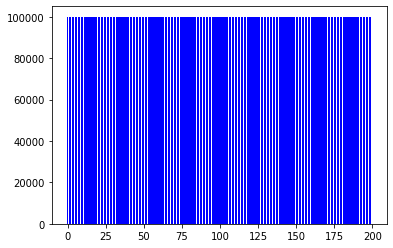

In [8]:
import numpy as np
import matplotlib.pyplot as plt

import random as pr


graph = []
graph.append([[0,1],1])
graph.append([[0,6],3])
graph.append([[1,2],1])
graph.append([[1,3],2])
graph.append([[2,5],3])
graph.append([[3,4],1])
graph.append([[3,6],4])
graph.append([[4,5],1])
graph.append([[4,9],2])
graph.append([[5,10],3])
graph.append([[6,7],1])
graph.append([[7,12],4])
graph.append([[8,9],1])
graph.append([[8,11],2])
graph.append([[9,10],1])
graph.append([[11,12],1])
graph.append([[12,13],1])

NODE_N = 14

START_POS= 4
END_POS = 13

current_pos = START_POS



def actionList(current_pos):
    lis = []
    for edge in graph:
        if (current_pos in edge[0]):
            lis.append(edge[0][1] if edge[0][0] == current_pos else edge[0][0])
    return lis


def step(action, current_pos):
    

    next_pos = action
    

    if is_checked[next_pos] == 1:
        done = 1
        reward = 0
    else:
        done = 0


        for edge in graph:
            if(edge[0] == [current_pos, next_pos] or edge[0] == [next_pos, current_pos]):
                reward = edge[1]

                break
                

        is_checked[next_pos] = 1
        
    if next_pos == END_POS:
        done = 1
        reward += 100000

    return next_pos, reward, done

def rargmax(vector):
    """ Argmax that chooses randomly among eligible maximum indices. """
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)


Q = np.zeros([NODE_N, NODE_N])
num_episodes = 2000
dis = 0.99
lr = 0.85

rList = []
for i in range(num_episodes):
    is_checked = np.zeros(NODE_N)
    if (i % 1000 == 0):
        print(i)
    
    rAll = 0
    current_pos = START_POS
    done = False
    e = 1 - i * 0.001
    while not done:
        
        
        
        if np.random.rand(1) < e:
            action = pr.choice(actionList(current_pos))
 
        else:
            action = rargmax(Q[current_pos, :])

        
        next_pos, reward, done = step(action, current_pos)

        Q[current_pos, action] = Q[current_pos, action] + lr * (reward + dis * np.max(Q[next_pos, :]) -Q[current_pos, action])

        rAll += reward
        #print(reward)
        current_pos = next_pos

    if i >= num_episodes * 0.9: #마지막 10%만 
        rList.append(rAll)
    
print("Average Point: " + str(sum(rList) / (num_episodes * 0.1)))
print("Final Q-Table Values")
tmp = [x for x in range(NODE_N)]
tmp = np.array(tmp)

with np.printoptions(precision=2, suppress=True):
    print(tmp)
    print(Q)
      

i = START_POS
print(START_POS, end="")


while(i != END_POS):
    print(" ->", rargmax(Q[i]), end="")
    i = rargmax(Q[i])


plt.bar(range(len(rList)), rList, color="blue")
plt.show()